In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from tqdm import tqdm
import warnings
from time import time

In [2]:
df = pd.read_csv('AEP_hourly.csv')

In [3]:
df.head()

,Datetime,AEP_MW
0,2004-10-01 01:00:00,12379.0
1,2004-10-01 02:00:00,11935.0
2,2004-10-01 03:00:00,11692.0
3,2004-10-01 04:00:00,11597.0
4,2004-10-01 05:00:00,11681.0


In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

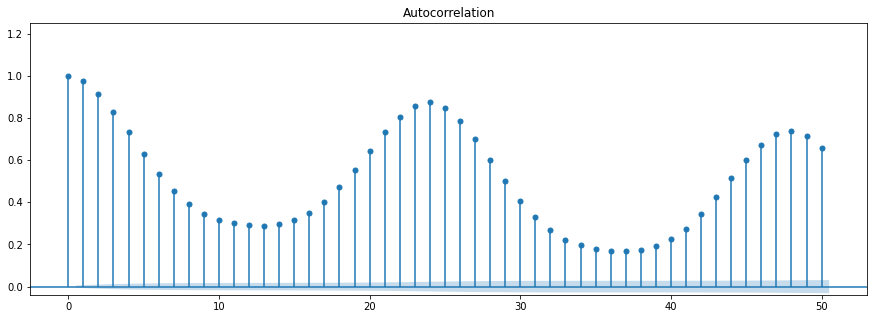

In [5]:
plt.rc("figure", figsize=(15,5))
dta = df.loc[:, "AEP_MW"]
sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=50, auto_ylims=True)
plt.show()

c:\program files\python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


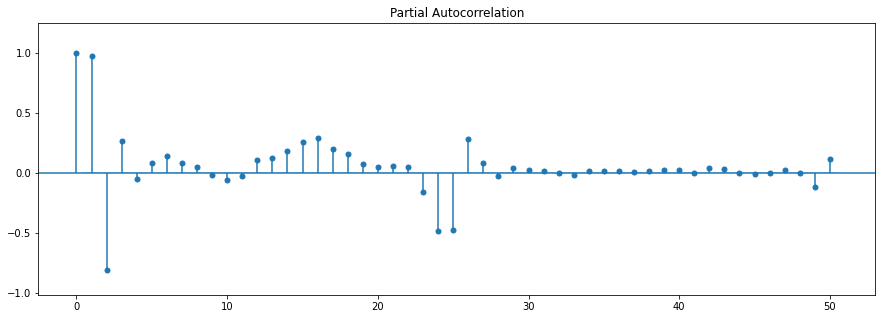

In [6]:
plt.rc("figure", figsize=(15,5))
dta = df.loc[:, "AEP_MW"]
sm.graphics.tsa.plot_pacf(dta.values.squeeze(), lags=50, auto_ylims=True)
plt.show()

In [7]:
start = time()
X = df.loc[:, "AEP_MW"].values
size = int(len(X) * 0.999)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in tqdm(range(len(test))):
    warnings.simplefilter("ignore", UserWarning)
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

end = time()
rmse = sqrt(mean_squared_error(test, predictions))

100%|████████████████████████████████████████████████████████████████████████████████| 122/122 [07:17<00:00,  3.59s/it]


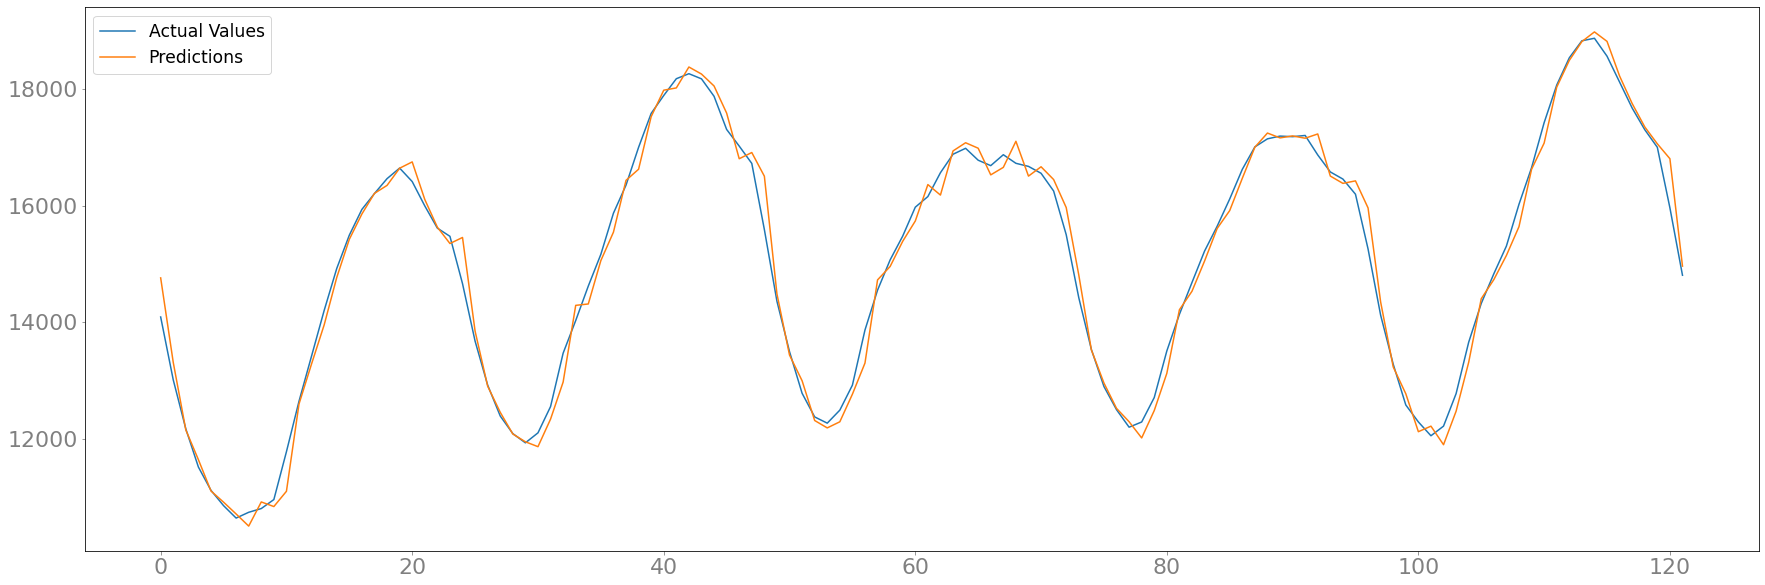

In [8]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(test, label='Actual Values')
ax.plot(predictions, label='Predictions')
ax.tick_params(axis='x', colors='grey', labelsize=22)
ax.tick_params(axis='y', colors='grey', labelsize=22)
ax.legend(fontsize='xx-large')
plt.show()

In [9]:
print("Test RMSE: %.3f" % rmse)
print("Total time taken to forecast: %.3f" % abs(start-end))

Test RMSE: 257.301
Total time taken to forecast: 438.002
